In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\Siranjeevi C\Data Science - Python\Mispriced Diamonds\Mispriced-Diamonds.csv')
df = df.sample(1000)

In [4]:
print('The top 10 records of the Data set: \n', df.head())
print('\nThe last 10 records of the Data set: \n',df.tail())
print('\nThe shape of the data set: \n',df.shape)

The top 10 records of the Data set: 
        carat clarity  price
38173   0.70      I1   1014
16100   1.00     SI1   6437
4027    1.11     SI1   3524
27651   1.70     VS1  18598
43718   0.52     SI1   1438

The last 10 records of the Data set: 
        carat clarity  price
18550   1.21     VS2   7562
52191   0.70     VS2   2479
14130   1.10     VS2   5729
18835   1.13     VS1   7720
13127   0.91     SI1   5431

The shape of the data set: 
 (1000, 3)


# Step1: Variable identification

### Type of Variables

##### Predictor variables:


#### Target variable:

### Data Type:

#### Character:
           

#### Numeric : 

### Variable type

#### Categorical

#### Continuous variable

# Step 2: Univariate Analysis 

In [5]:
#Descriptive Statistical measures helps us find measures of central tendency and measures of spread.
df.describe()

,carat,price
count,1000.00000,1000.000000
mean,0.78695,3792.152000
std,0.45300,3834.870243
min,0.21000,326.000000
25%,0.40000,964.000000
50%,0.70000,2353.500000
75%,1.03250,5156.500000
max,2.57000,18598.000000


In [7]:
### Categorical Variable 
#### we use  frequency distribution table to find the spread of the data under each category

char_var = ['clarity']
df['clarity'].value_counts()


SI1     255
VS2     210
SI2     172
VS1     161
VVS2     86
VVS1     69
IF       28
I1       19
Name: clarity, dtype: int64



 AxesSubplot(0.125,0.125;0.775x0.755)


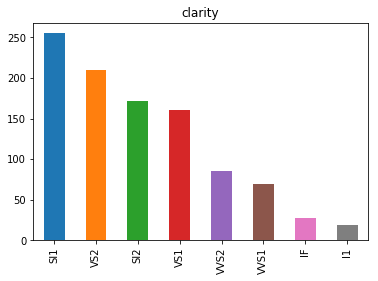

In [11]:
    plt.figure()
    plt.title('clarity')
    print('\n\n',df['clarity'].value_counts().plot.bar())

In [12]:
df.isnull().sum()

carat      0
clarity    0
price      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000216CA7F7E10>,
      dtype=object)

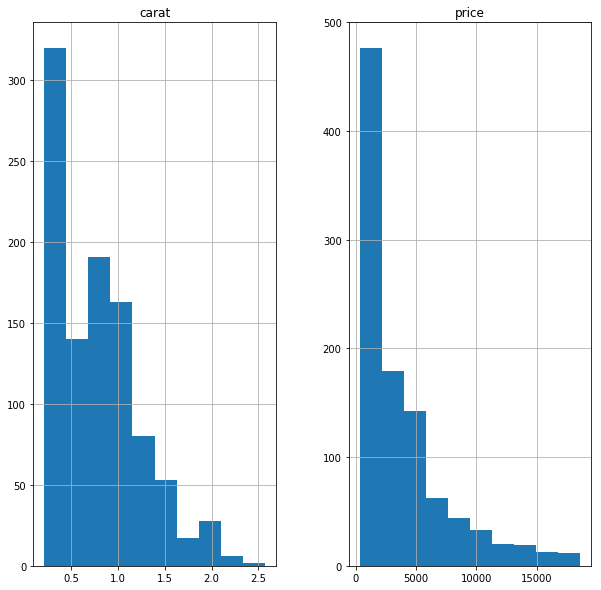

In [13]:
plt.rcParams['figure.figsize']=[10,10]
df.hist()

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['clarity'] = encoder.fit_transform(df['clarity'])

In [17]:
df

,carat,clarity,price
38173,0.70,0,1014
16100,1.00,2,6437
4027,1.11,2,3524
27651,1.70,4,18598
43718,0.52,2,1438
802,0.73,5,2862
47469,0.51,7,1859
23305,1.52,5,11338
4334,1.05,3,3599
39610,0.30,4,491


In [28]:
x = df.iloc[:,0:2]
y = df.iloc[:,2]

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 3)

In [30]:
x_train = np.array(x_train)
x_test  = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array (y_test)

In [34]:
x_train = x_train.reshape(-1,1)
x_test  = x_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

array([[0.5 , 2.  ],
       [1.04, 3.  ],
       [0.41, 7.  ],
       ...,
       [0.27, 6.  ],
       [0.34, 2.  ],
       [0.82, 4.  ]])

In [38]:
mean_x = np.mean(x_train)
mean_y = np.mean(y_train)
#length of x
m = len(x_train)
#using the formula to calculate b1 and b0
numer = 0
denom = 0
for i in range (m):
    numer += (x_train[i]-mean_x)*(y_train[i]-mean_y)
    denom += (x_train[i]-mean_x)**2
    
b1 = numer / denom
b0 = mean_y - b1*mean_x
print(b1, b0)

[641.09482335 -91.01696304] [2267.69951907 3924.87638252]


In [41]:
m = len(x_test)
for i in range (m) : 
 y_pred = b0 + b1*(x_test[i])
y_pred

array([2479.26081077, 3560.80853037])